<a href="https://colab.research.google.com/github/ramprasathmk/Soft-Computing-Lab-2024/blob/main/SoftComputingLab_(VI_SEM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy numpy matplotlib

**GitHub:** [@ramprasathmk/Soft-Computing-Lab-2024](https://github.com/ramprasathmk/Soft-Computing-Lab-2024.git)

**REFERENCE LINKS:**
 - [scikit-fuzzy Examples](https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/index.html)
 - [fuzzy-k-means](https://www.xlstat.com/en/solutions/features/fuzzy-k-means-clustering)
 - [examples](https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_cmeans.html)

In [ ]:
%matplotlib inline

## EX: 1.A Fuzzy Set Operations

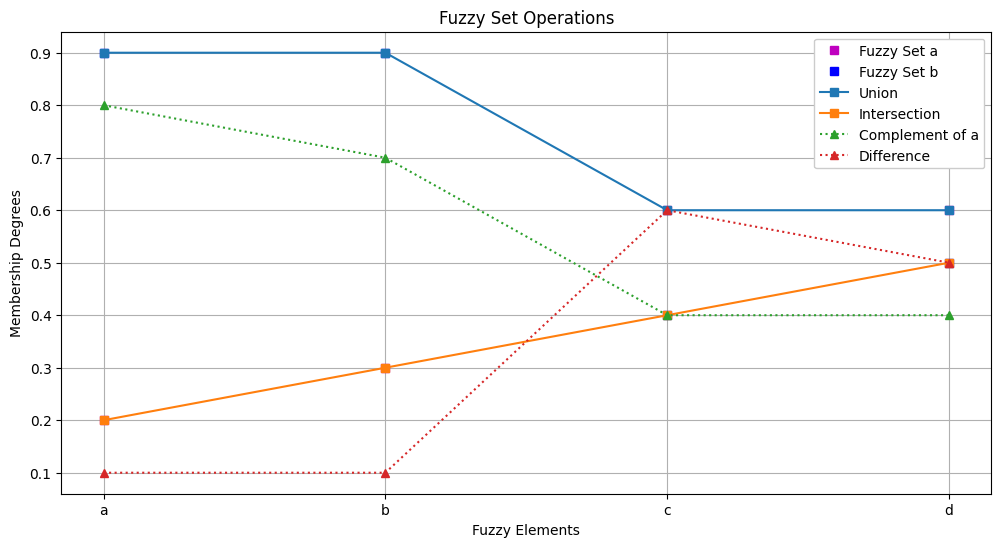

In [ ]:
import matplotlib.pyplot as plt

a = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
b = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

# Union
union = {i: max(a[i], b[i]) for i in a}

# Intersection
intersection = {i: min(a[i], b[i]) for i in a}

# Complement
complement_a = {i: 1 - a[i] for i in a}
complement_b = {i: 1 - b[i] for i in b}

# Difference
difference = {i: min(a[i], 1 - b[i]) for i in a}

# Plotting the fuzzy sets and their operations
x = list(a.keys())

plt.figure(figsize=(12, 6))
# plt.figure(figsize=(8, 6))

# Plot Fuzzy Set a
plt.plot(x, [a[i] for i in x], "ms", label='Fuzzy Set a')

# Plot Fuzzy Set b
plt.plot(x, [b[i] for i in x], "bs", label='Fuzzy Set b')

# Plot Union
plt.plot(x, [union[i] for i in x], label='Union', linestyle='-', marker='s')

# Plot Intersection
plt.plot(x, [intersection[i] for i in x], label='Intersection', linestyle='-', marker='s')

# Plot Complement of a
plt.plot(x, [complement_a[i] for i in x], label='Complement of a', linestyle=':', marker='^')

# Plot Difference
plt.plot(x, [difference[i] for i in x], label='Difference', linestyle=':', marker='^')

plt.title('Fuzzy Set Operations')
plt.xlabel('Fuzzy Elements')
plt.ylabel('Membership Degrees')
plt.legend(framealpha=1)
plt.grid(True)
plt.show()


## EX: 1.B DeMorgan's Law in Fuzzy Sets

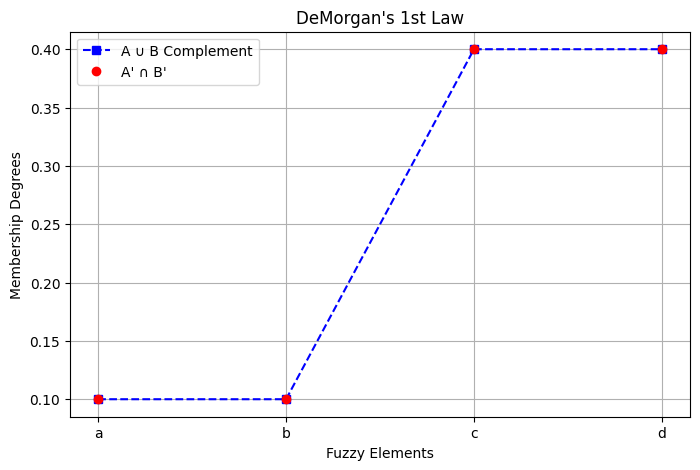

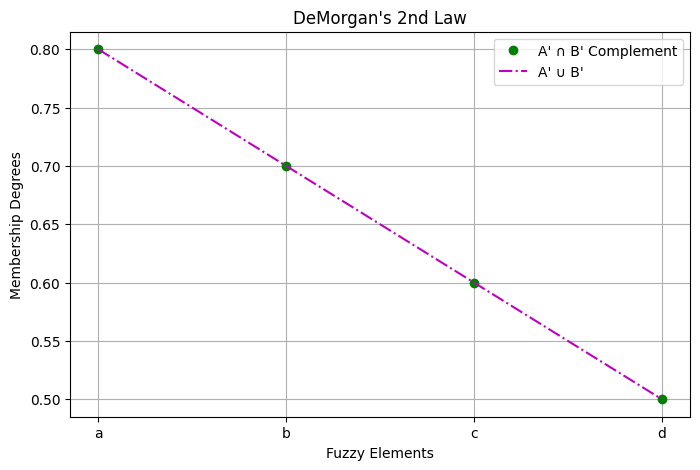

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have implemented Union, Intersection, and Complement functions

def Union(a, b):
    return {i: max(a[i], b[i]) for i in a}

def Intersection(a, b):
    intersection = {i: min(a[i], b[i]) for i in a}
    return intersection

def Complement(a):
    complement = {i: 1 - a[i] for i in a}
    return complement

def visualize_fuzzy_set(title, fuzzy_set, style):
    x = list(fuzzy_set.keys())
    y = [fuzzy_set[i] for i in x]

    plt.plot(x, y, style, label=title)

# DeMorgan's First Law
def DeMorgans_1stLaw(a, b):
    AUB_comp = Complement(Union(a, b))
    ACOMP_intr_BCOMP = Intersection(Complement(a), Complement(b))

    plt.figure(figsize=(8, 5))
    visualize_fuzzy_set('A ∪ B Complement', AUB_comp, "bs--")
    visualize_fuzzy_set('A\' ∩ B\'', ACOMP_intr_BCOMP, "ro")

    plt.title("DeMorgan's 1st Law")
    plt.xlabel('Fuzzy Elements')
    plt.ylabel('Membership Degrees')
    plt.legend()
    plt.grid(True)
    plt.show()

# DeMorgan's Second Law
def DeMorgans_2ndLaw(a, b):
    COMP_INTR = Complement(Intersection(a, b))
    ACOMP_union_BCOMP = Union(Complement(a), Complement(b))

    plt.figure(figsize=(8, 5))
    visualize_fuzzy_set('A\' ∩ B\' Complement', COMP_INTR, "go")
    visualize_fuzzy_set('A\' ∪ B\'', ACOMP_union_BCOMP, "m-.")

    plt.title("DeMorgan's 2nd Law")
    plt.xlabel('Fuzzy Elements')
    plt.ylabel('Membership Degrees')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
a = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
b = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

DeMorgans_1stLaw(a, b)
DeMorgans_2ndLaw(a, b)


##  EX: 1.C Fuzzy Relations ( Max-Min and Max-Product Compositions)

Max-Min composition:  [[0.6 0.5 0.3]
 [0.8 0.4 0.7]]
Max-Product composition:  [[0.6  0.3  0.21]
 [0.72 0.36 0.63]]


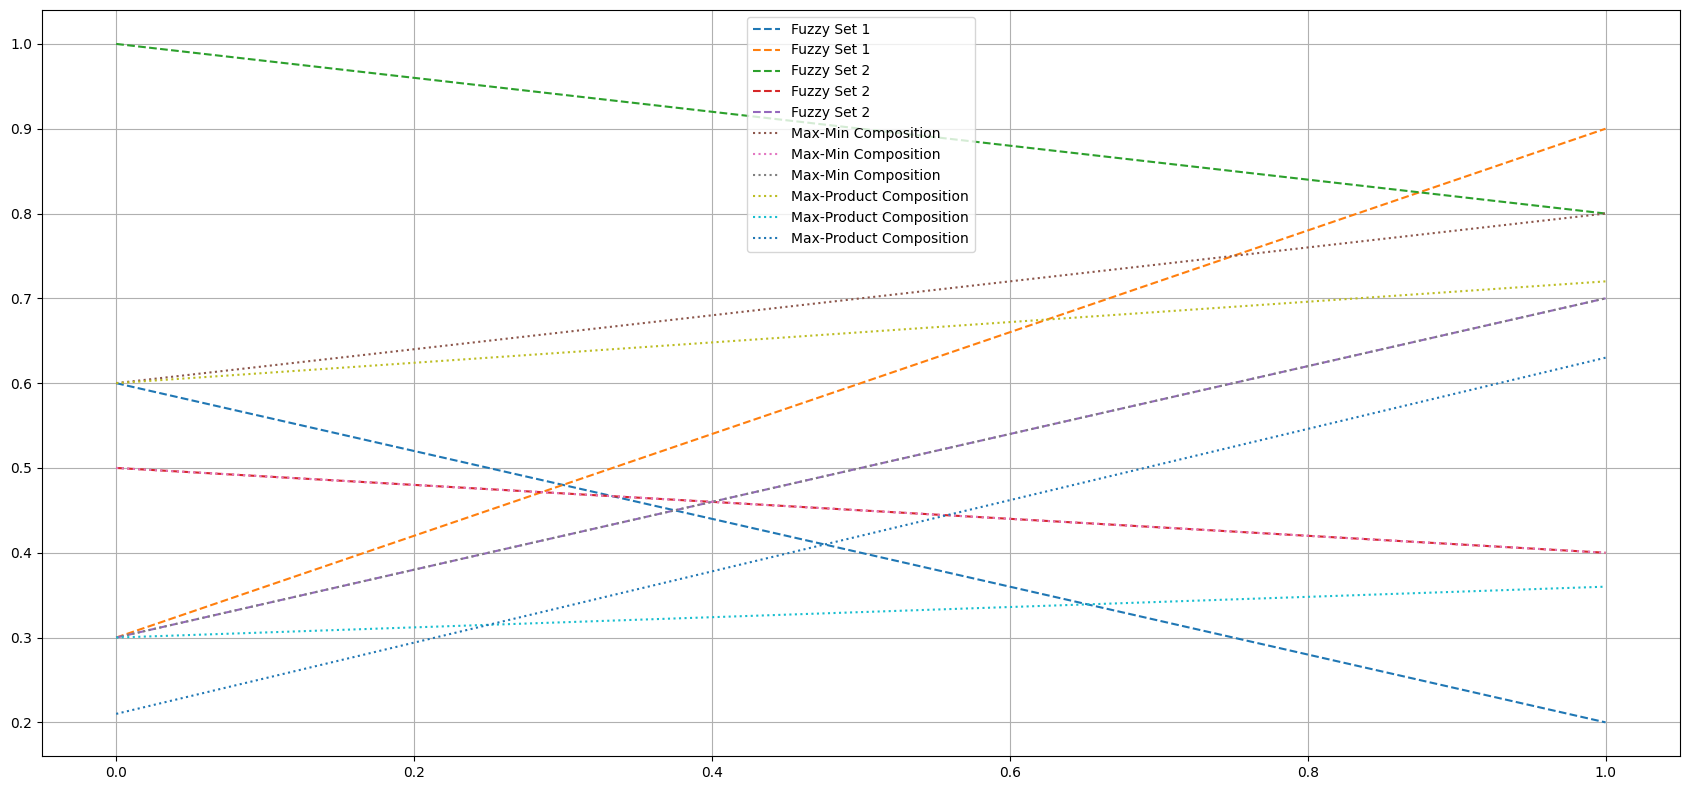

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R1 = np.array([[0.6, 0.3],
               [0.2, 0.9]])

R2 = np.array([[1, 0.5, 0.3],
               [0.8, 0.4, 0.7]])

# Perform max-min composition
def max_min_composition(R1, R2):
    result = np.zeros((len(R1), len(R2[0])))
    for i in range(len(R1)):
        for j in range(len(R2[0])):
            max_min = 0
            for k in range(len(R1[0])):
                max_min = max(max_min, min(R1[i][k], R2[k][j]))
            result[i][j] = max_min
    return result

# Perform max-product composition
def max_product(R1, R2):
    result = np.zeros((len(R1), len(R2[0])))
    for i in range(len(R1)):
        for j in range(len(R2[0])):
            max_min = 0
            for k in range(len(R1[0])):
                max_min = max(max_min, (R1[i][k]* R2[k][j]))
            result[i][j] = max_min
    return result

# Call the max_min_composition function
result = max_min_composition(R1, R2)
# Call the max_product_composition function
res = max_product(R1, R2)

print("Max-Min composition: ", result)
print("Max-Product composition: ", res)


def GRaph():
    plt.figure(figsize=(17,8))
    plt.plot(R1, linestyle="--", label="Fuzzy Set 1")
    plt.plot(R2, linestyle="--", label="Fuzzy Set 2")

    plt.plot(result, linestyle=":", label="Max-Min Composition")
    plt.plot(res, linestyle=":", label="Max-Product Composition")
    plt.legend() #framealpha=1
    plt.grid(True)
    plt.tight_layout()

    plt.show()

GRaph()


## EX: 2.A Fuzzy Light Controller

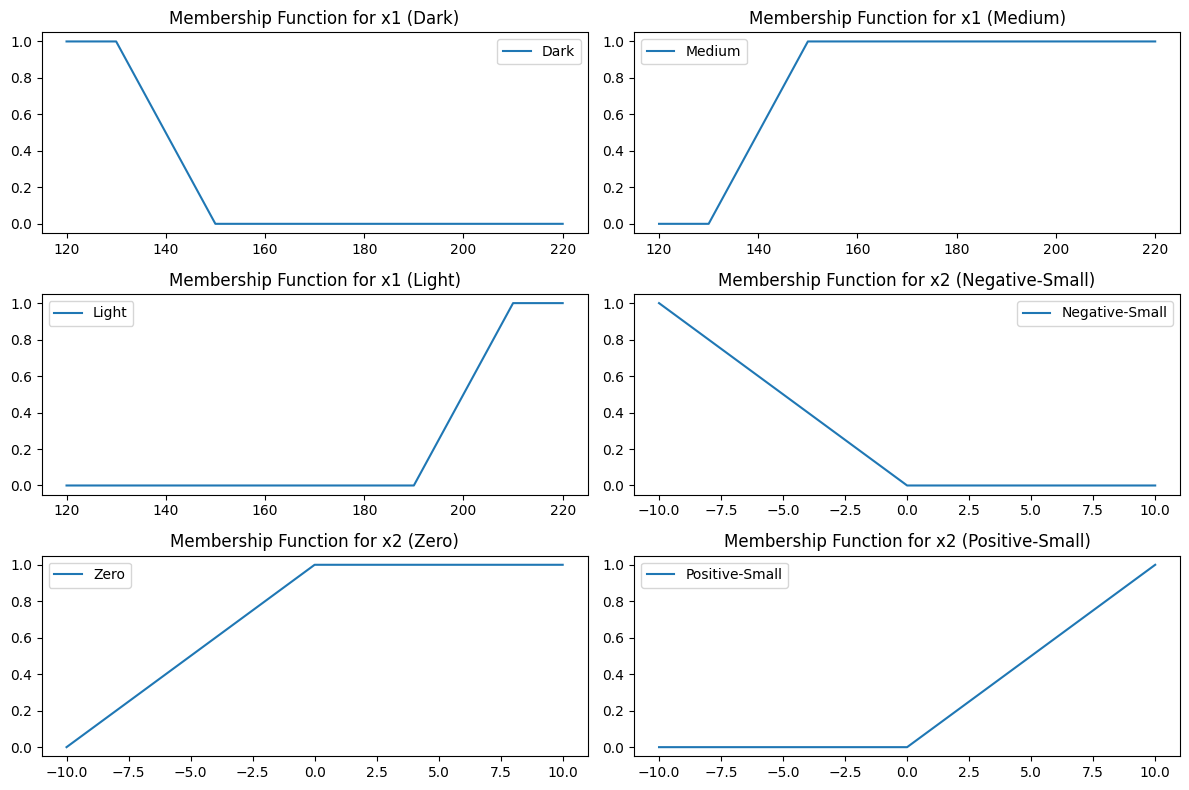

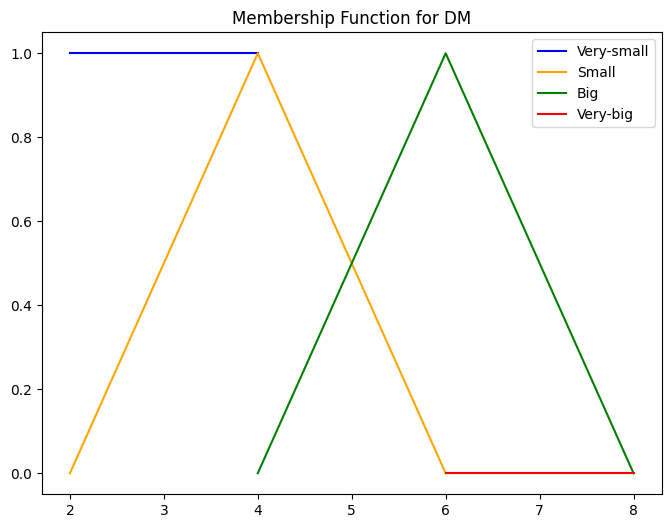

Output DM: 7.000000000000001


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the membership functions
x1_dark = [130, 150]
x1_medium = [130, 150, 190, 210]
x1_light = [190, 210]

x2_ns = [-20, -10, 0]
x2_ze = [-10, 0, 10]
x2_ps = [0, 10, 20]

dm_vs = [2, 4]
dm_s = [2, 4, 6]
dm_b = [4, 6, 8]
dm_vb = [6, 8]

# Define inputs
x1_input = 125
x2_input = -6

# Fuzzification
x1_universe = np.arange(120, 221, 1)
x2_universe = np.arange(-10, 11, 1)

x1_dark_membership = np.fmin(np.fmax(0, (x1_dark[1] - x1_universe) / (x1_dark[1] - x1_dark[0])), 1)
x1_medium_membership = np.fmin(np.fmax(0, (np.minimum(x1_medium[2], x1_universe) - x1_medium[0]) / (x1_medium[1] - x1_medium[0])), 1)
x1_light_membership = np.fmin(np.fmax(0, (x1_universe - x1_light[0]) / (x1_light[1] - x1_light[0])), 1)

x2_ns_membership = np.fmin(np.fmax(0, (x2_ns[2] - x2_universe) / (x2_ns[2] - x2_ns[1])), 1)
x2_ze_membership = np.fmin(np.fmax(0, (np.minimum(x2_ze[2], x2_universe) - x2_ze[0]) / (x2_ze[1] - x2_ze[0])), 1)
x2_ps_membership = np.fmin(np.fmax(0, (x2_universe - x2_ps[0]) / (x2_ps[1] - x2_ps[0])), 1)

# Rule Evaluation
rule_strengths_vs = np.minimum(x1_light_membership[:len(x2_ns_membership)], x2_ns_membership)
rule_strengths_s = np.minimum(x1_medium_membership[:len(x2_ze_membership)], x2_ze_membership)
rule_strengths_b = np.minimum(x1_dark_membership[:len(x2_ps_membership)], x2_ps_membership)

# Defuzzification
numerator = np.sum([value * ((dm_vb[0] + dm_vb[1]) / 2) for value in [rule_strengths_vs, rule_strengths_s, rule_strengths_b]])
denominator = np.sum([rule_strengths_vs, rule_strengths_s, rule_strengths_b])
output = numerator / denominator if denominator != 0 else 0

# Plot membership functions
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(x1_universe, x1_dark_membership, label='Dark')
plt.title('Membership Function for x1 (Dark)')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x1_universe, x1_medium_membership, label='Medium')
plt.title('Membership Function for x1 (Medium)')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x1_universe, x1_light_membership, label='Light')
plt.title('Membership Function for x1 (Light)')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x2_universe, x2_ns_membership, label='Negative-Small')
plt.title('Membership Function for x2 (Negative-Small)')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x2_universe, x2_ze_membership, label='Zero')
plt.title('Membership Function for x2 (Zero)')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x2_universe, x2_ps_membership, label='Positive-Small')
plt.title('Membership Function for x2 (Positive-Small)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot output membership function
plt.figure(figsize=(8, 6))
plt.plot([dm_vs[0], dm_vs[1]], [1, 1], label='Very-small', color='blue')
plt.plot([dm_s[0], dm_s[1], dm_s[2]], [0, 1, 0], label='Small', color='orange')
plt.plot([dm_b[0], dm_b[1], dm_b[2]], [0, 1, 0], label='Big', color='green')
plt.plot([dm_vb[0], dm_vb[1]], [0, 0], label='Very-big', color='red')
plt.title('Membership Function for DM')
plt.legend()
plt.show()

# Print the output value
print("Output DM:", output)

## EX: 2.B Fuzzy Logic Colntoller

Control action for x=3 and y=5 is u=6.0200000000000005


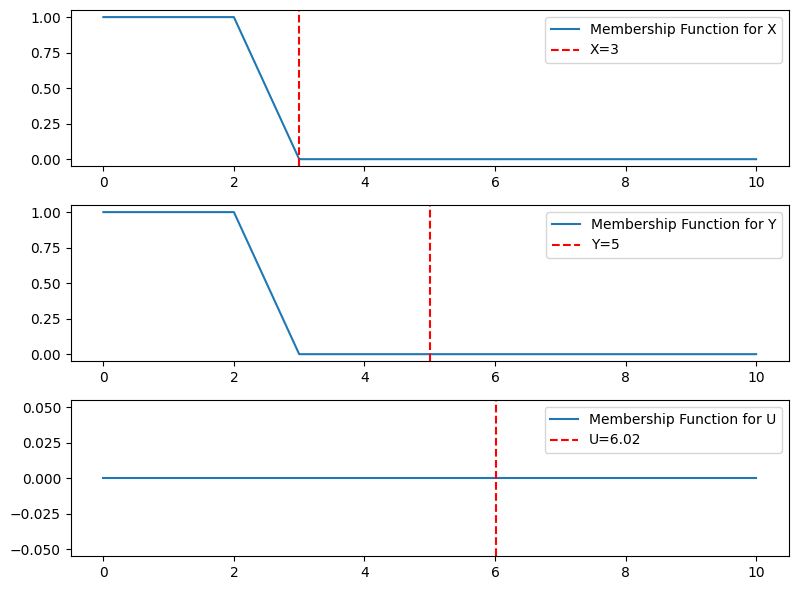

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define membership functions
def membership_L(x, a, b):
    return max(0, min((b - x) / (b - a), 1))

def membership_U(x, a, b):
    return max(0, min((x - a) / (b - a), 1))

def membership_Pi(x, a, b, c, d):
    if b == a:
        return 1 if x==b else 0
    elif d == c:
        return 1 if x==c else 0
    else:
        return max(0, min((x - a) / (b - a), 1, (d - x) / (d - c)))

# Inputs
x = 3
y = 5

# Membership values for x and y
mu_N_x = 0.66
mu_Z_x = 0.34  # Updated based on the given rule
mu_P_x = 0

mu_N_y = 0
mu_Z_y = 1
mu_P_y = 0

# Fuzzy rules
# Rule 1: If (X is N) and (Y is Z) then (U is M)
mu_M_u = min(mu_N_x, mu_Z_y)

# Rule 2: If (X is Z) and (Y is Z) then (U is H)
mu_H_u = min(mu_Z_x, mu_Z_y)

# Calculate the centroid of the output fuzzy set
u_values = np.arange(0, 11)
u_membership_values = [0, 0, 0, 0, mu_M_u, mu_M_u, mu_M_u, mu_H_u, mu_H_u, mu_H_u, 0]

numerator = np.sum(u_values * u_membership_values)
denominator = np.sum(u_membership_values)
u = numerator / denominator

print("Control action for x={} and y={} is u={}".format(x, y, u))

# Plot membership functions
x_values = np.arange(0, 11)
y_values = np.zeros_like(x_values)
u_values = np.zeros_like(x_values)

for i, val in enumerate(x_values):
    y_values[i] = membership_L(val, 2, 4)
    u_values[i] = membership_L(val, 6, 8)

plt.figure(figsize=(8, 6))
plt.subplot(311)
plt.plot(x_values, y_values, label='Membership Function for X')
plt.axvline(x=3, color='r', linestyle='--', label='X=3')
plt.legend()

for i, val in enumerate(x_values):
    y_values[i] = membership_L(val, 2, 4)
    u_values[i] = membership_Pi(val, 2, 5, 8, 8)

plt.subplot(312)
plt.plot(x_values, y_values, label='Membership Function for Y')
plt.axvline(x=5, color='r', linestyle='--', label='Y=5')
plt.legend()

for i, val in enumerate(x_values):
    u_values[i] = membership_L(val, 0, 3)
    u_values[i] += membership_Pi(val, 2, 5, 8, 8)
    u_values[i] += membership_U(val, 6, 8)
    u_values[i] /= 3

plt.subplot(313)
plt.plot(x_values, u_values, label='Membership Function for U')
plt.axvline(x=u, color='r', linestyle='--', label='U={:.2f}'.format(u))
plt.legend()

plt.tight_layout()
plt.show()


## Ex: 3 Fuzzy Inference System

Control action for SP=910, SC=6.5 is V=2.4375


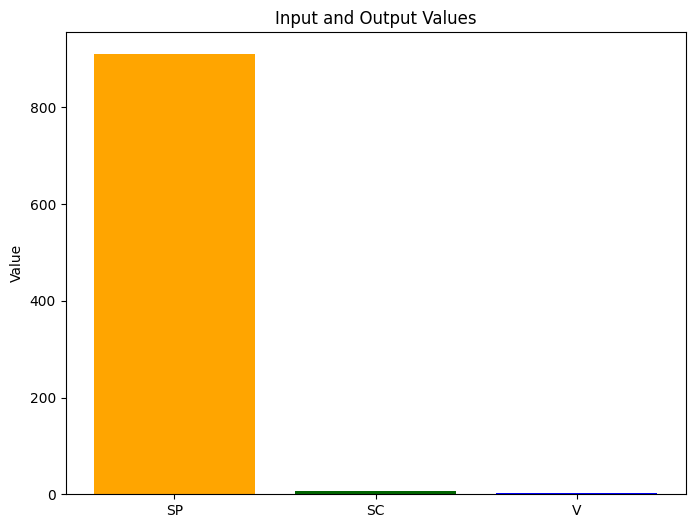

In [ ]:
import matplotlib.pyplot as plt

def calculate_control_action(SP, SC):
    # Membership values
    mu_N_SP = 0.5 if SP == 750 else 0
    mu_F_SP = 0.5 if SP == 900 else 0
    mu_M_SC = (8 - SC) / 2 if 6 <= SC <= 8 else 0
    mu_H_SC = (SC - 6) / 2 if 6 <= SC <= 8 else 0

    # Fuzzy rules
    V_NC = (2.4 + 2.5 + 2.6) / 3
    V_DN = (2.1 + 2.2 + 2.3 + 2.4) / 4

    # Calculate output voltage V
    V = (0.25 * V_DN + 0.75 * V_NC) / (0.25 + 0.75)

    return V

# Example usage
SP = 910
SC = 6.5
control_action = calculate_control_action(SP, SC)
print("Control action for SP={}, SC={} is V={}".format(SP, SC, control_action))

# Display input values SP and SC, and output V
plt.figure(figsize=(8, 6))
plt.bar(['SP', 'SC', 'V'], [SP, SC, control_action], color=['orange', 'darkgreen', 'blue'])
plt.ylabel('Value')
plt.title('Input and Output Values')
plt.show()

## EX: 4 Implementation of Perceptron in Fuzzy

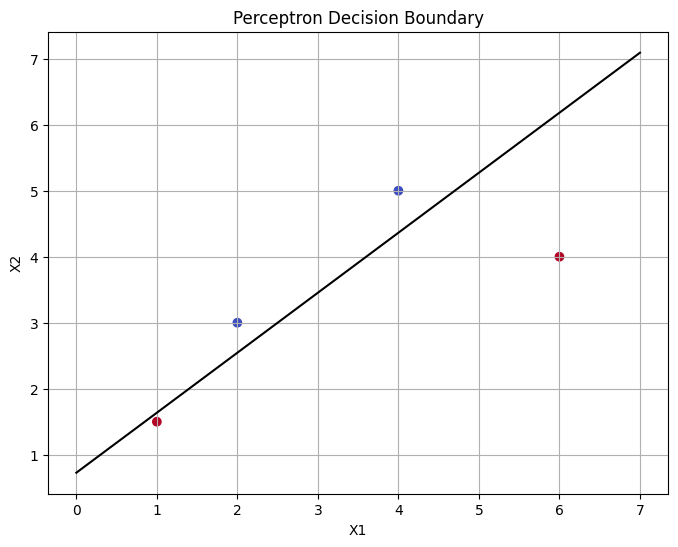

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_dim + 1)

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

def plot_decision_boundary(X, y, perceptron):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Plotting decision boundary
    x_vals = np.array([min(X[:,0]) - 1, max(X[:,0]) + 1])
    y_vals = -(perceptron.weights[0] + perceptron.weights[1] * x_vals) / perceptron.weights[2]
    plt.plot(x_vals, y_vals, color='black')
    # plt.legend()
    plt.grid(True)

    plt.show()

def main():
    # Example data
    X = np.array([[2, 3], [4, 5], [1, 1.5], [6, 4]])
    y = np.array([0, 0, 1, 1])  # Labels

    perceptron = Perceptron(input_dim=2)
    perceptron.train(X, y)

    plot_decision_boundary(X, y, perceptron)

if __name__ == "__main__":
    main()

## EX: 5.A

In [4]:
class McCullochPittsNeuron:

    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def activate(self, inputs):
        # Calculate the weighted sum of inputs
        weighted_sum = sum(w * x for w, x in zip(self.weights, inputs))
        # Check if the weighted sum exceeds the threshold
        return 1 if weighted_sum > self.threshold else 0

# Implementing the ANDNOT function
def ANDNOT(a, b):
    # Define weights and threshold for the McCulloch-Pitts neuron
    weights = [-1, -1] # Inverted weights for ANDNOT
    threshold = -0.5 # Adjusted threshold for ANDNOT
    # Create a McCulloch-Pitts neuron with the specified weights and threshold
    neuron = McCullochPittsNeuron(weights, threshold)

    # Input values
    inputs = [a, b]

    # Get the output of the neuron
    result = neuron.activate(inputs)
    return result


# Testing the ANDNOT function
def main():
   print("ANDNOT(0, 0) =", ANDNOT(0, 0)) # Output should be 1
   print("ANDNOT(0, 1) =", ANDNOT(0, 1)) # Output should be 1
   print("ANDNOT(1, 0) =", ANDNOT(1, 0)) # Output should be 0
   print("ANDNOT(1, 1) =", ANDNOT(1, 1)) # Output should be 1


# Driver Code
if __name__ == '__main__':
   main()

ANDNOT(0, 0) = 1
ANDNOT(0, 1) = 0
ANDNOT(1, 0) = 0
ANDNOT(1, 1) = 0


## EX: 5.B

## EX: 6

## EX:7